# Deutsch-Jozsa-Algorithmus

In diesem Abschnitt führen wir zunächst das Deutsch-Jozsa-Problem ein und klassische und Quantenalgorithmen zu seiner Lösung. Anschließend implementieren wir den Quantenalgorithmus mit Qiskit und führen ihn auf einem Simulator und Quantencomputer aus.

## 1. Einleitung<a id="introduction"></a>

Der erstmals in Referenz [1] vorgestellte Deutsch-Jozsa-Algorithmus war das erste Beispiel eines Quantenalgorithmus, der eine bessere Leistung als der beste klassische Algorithmus erbringt. Es zeigte sich, dass die Verwendung eines Quantencomputers als Rechenwerkzeug für ein bestimmtes Problem Vorteile haben kann.

### 1.1 Deutsch-Jozsa-Problem<a id="djproblem"> </a>

Wir erhalten eine versteckte boolesche Funktion $f$, die als Eingabe eine Zeichenfolge von Bits annimmt und entweder $0$ oder $1$ zurückgibt, das heißt:

$$ f({x_0,x_1,x_2,...}) \rightarrow 0 \textrm{ oder } 1 \textrm{ , wobei } x_n \textrm{ } 0 \textrm{ oder } 1$$ ist

Die Eigenschaft der gegebenen booleschen Funktion ist, dass sie entweder ausgeglichen oder konstant ist. Eine konstante Funktion gibt alle $0$ oder alle $1$ für jede Eingabe zurück, während eine ausgeglichene Funktion $0$ für genau die Hälfte aller Eingaben und $1$ für die andere Hälfte zurückgibt. Unsere Aufgabe ist es, zu bestimmen, ob die gegebene Funktion ausgeglichen oder konstant ist.

Beachten Sie, dass das Deutsch-Jozsa-Problem eine $n$-Bit-Erweiterung des Einzelbit-Deutsch-Problems ist.

### 1.2 Die klassische Lösung<a id="classical-solution"> </a>

Klassischerweise können im besten Fall zwei Abfragen an das Orakel feststellen, ob die versteckte boolesche Funktion $f(x)$ ausgeglichen ist: z.B. wenn wir beide $f(0,0,0,...)\rightarrow bekommen 0$ und $f(1,0,0,...) \rightarrow 1$, dann wissen wir, dass die Funktion ausgeglichen ist, da wir die beide unterschiedlichen Ausgaben erhalten haben.

Im schlimmsten Fall, wenn wir weiterhin die gleiche Ausgabe für jede Eingabe sehen, die wir versuchen, müssen wir genau die Hälfte aller möglichen Eingaben plus eine überprüfen, um sicher zu sein, dass $f(x)$ konstant ist. Da die Gesamtzahl der möglichen Eingaben $2^n$ beträgt, bedeutet dies, dass wir $2^{n-1}+1$ Versuchseingaben benötigen, um sicher zu sein, dass $f(x)$ im schlimmsten Fall konstant ist. Wenn wir zum Beispiel für einen $4$-Bit-String $8$ aus den möglichen $16$-Kombinationen herausgesucht haben und alle $0$ erhalten, ist es immer noch möglich, dass die $9^\textrm{th}$-Eingabe $1$ zurückgibt und $f(x)$ ist ausgeglichen. Probabilistisch ist dies ein sehr unwahrscheinliches Ereignis. Tatsächlich können wir, wenn wir ständig nacheinander dasselbe Ergebnis erhalten, die Wahrscheinlichkeit, dass die Funktion als Funktion von $k$ Eingaben konstant ist, wie folgt ausdrücken:

$$ P_\textrm{Konstante}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 &lt; k \leq 2^{n-1}$$

Realistischerweise könnten wir uns dafür entscheiden, unseren klassischen Algorithmus frühzeitig zu kürzen, sagen wir, wenn wir uns zu mehr als x % sicher wären. Aber wenn wir 100 % sicher sein wollen, müssten wir $2^{n-1}+1$ Eingaben überprüfen.

### 1.3 Quantenlösung<a id="quantum-solution"> </a>

Mit einem Quantencomputer können wir dieses Problem nach nur einem Aufruf der Funktion $f(x)$ zu 100% sicher lösen, vorausgesetzt wir haben die Funktion $f$ als Quantenorakel implementiert, das den Zustand $\vert x abbildet \rangle \vert y\rangle $ zu $ \vert x\rangle \vert y \oplus f(x)\rangle$, wobei $\oplus$ Addition modulo $2$ ist. Unten ist die generische Schaltung für den Deutsch-Jozsa-Algorithmus.

![Bild1](images/deutsch_steps.png)

Gehen wir nun die Schritte des Algorithmus durch:

1. Bereite zwei Quantenregister vor. Das erste ist ein $n$-Qubit-Register, das auf $|0\rangle$ initialisiert ist, und das zweite ist ein Ein-Qubit-Register, das auf $|1\rangle$ initialisiert ist:

    $$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$

2. Wende auf jedes Qubit ein Hadamard-Gatter an:

    $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left( |0\rangle - |1 \rangle \right)$$

3. Wende das Quantenorakel $\vert x\rangle \vert y\rangle$ auf $\vert x\rangle \vert y \oplus f(x)\rangle$ an: $$ \begin{aligned} \lvert \psi_2 \rangle
     &amp; = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \
     &amp; = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) \end{aligned} $$

    denn für jedes $x ist f(x)$ entweder $0$ oder $1$.

4. An diesem Punkt kann das zweite einzelne Qubit-Register ignoriert werden. Wende ein Hadamard-Gatter auf jedes Qubit im ersten Register an: $$ \begin{aligned} \lvert \psi_3 \rangle &amp; = \frac{1}{2^n}\sum_{x=0}^{2^n- 1}(-1)^{f(x)} \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} \vert y \rangle \right] \ &amp; = \frac{1}{2^n}\sum_{y=0}^{2^n-1} \left[ \sum_{x=0}^{2^n-1}(-1) ^{f(x)}(-1)^{x \cdot y} \right] \vert y \rangle \end{aligned} $$

    wobei $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ die Summe des bitweisen Produkts ist.

5. Messen Sie das erste Register. Beachten Sie, dass die Wahrscheinlichkeit der Messung von $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1) ^{f(x)} \rvert^2$, was zu $1$ ausgewertet wird, wenn $f(x)$ konstant ist, und zu $0$, wenn $f(x)$ ausgeglichen ist.

### 1.4 Warum funktioniert das?<a id="why-does-this-work"> </a>

- **Konstantes Orakel**

Wenn das Orakel *konstant* ist, hat es (bis auf eine globale Phase) keine Auswirkung auf die Eingabe-Qubits, und die Quantenzustände vor und nach dem Abfragen des Orakels sind gleich. Da das H-Gatter seine eigene Umkehrung ist, kehren wir in Schritt 4 Schritt 2 um, um den anfänglichen Quantenzustand von $|00\dots 0\rangle$ im ersten Register zu erhalten.

# $$ H^{\otimes n}\begin{bmatrix} 1 \ 0 \ 0 \ \vdots \ 0 \end{bmatrix}

Nach Schritt 2 ist unser Eingangsregister eine gleichmäßige Überlagerung aller Zustände in der Berechnungsbasis. Wenn das Orakel *ausgeglichen* ist, fügt der Phasenrückschlag genau der Hälfte dieser Zustände eine negative Phase hinzu:

# $$ U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \ 1 \ 1 \ \vdots \ 1 \end{bmatrix}

Der Quantenzustand nach der Abfrage des Orakels ist orthogonal zum Quantenzustand vor der Abfrage des Orakels. Daher müssen wir in Schritt 4 beim Anwenden der H-Gatter einen Quantenzustand erhalten, der orthogonal zu $|00\dots 0\rangle$ ist. Das bedeutet, dass wir niemals den Alle-Null-Zustand messen sollten.


## 2. Ausgearbeitetes Beispiel<a id="example"></a>

Lasst uns ein spezifisches Beispiel für eine symmetrische Zwei-Bit-Funktion durchgehen:

Stellen Sie sich eine Zwei-Bit-Funktion $f(x_0,x_1)=x_0 \oplus x_1$ vor, so dass

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

Das entsprechende Phasenorakel dieser Zwei-Bit-Sprache ist $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

Wir werden nun überprüfen, ob dieses Orakel wie erwartet funktioniert, indem wir einen Beispielzustand $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$ nehmen

1. Das erste Register von zwei Qubits wird auf $|00\rangle$ und das zweite Register-Qubit auf $|1\rangle$ initialisiert

    (Beachten Sie, dass wir die Indizes 0, 1 und 2 verwenden, um die Qubits zu indizieren. Ein Index von „01“ gibt den Status des Registers an, das die Qubits 0 und 1 enthält.)

    $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

2. Wenden Sie Hadamard auf alle Qubits an

    $$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) *{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)* {2} $$

3. Die Orakelfunktion kann implementiert werden als $\text{Q} *f = CX* {02}CX_{12}$, $$ \begin{aligned} \lvert \psi_2 \rangle = \frac{1}{2\sqrt{2 }} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right) *{2} \ + \lvert 0 1 \rangle* {01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right) *{2} \ + \lvert 1 0 \rangle* {01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right) *{2} \ + \lvert 1 1 \rangle* {01} \ otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right] \end{aligned} $$

4. Vereinfacht erhalten wir Folgendes: $$ \begin{aligned} \lvert \psi_2 \rangle &amp; = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) *{2} - \lvert 0 1 \rangle* {01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) *{ 2} - \lvert 1 0 \rangle* {01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) *{2} + \lvert 1 1 \rangle* {01} \otimes \left( \ lvert 0 \rangle - \lvert 1 \rangle \ *right) {2} \right] \ &amp; = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)* {01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right) *{2} \ &amp; = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)* {0} \otimes \frac{1}{\sqrt{2}} \ left( \lvert 0 \rangle - \lvert 1 \rangle \right) *{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)* {2} \end{aligned} $$

5. Wende Hadamard auf das erste Register an

    $$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$

6. Die Messung der ersten beiden Qubits ergibt die Nicht-Null-$11$, was auf eine ausgeglichene Funktion hinweist.

## 3. Erstellen von Quantenorakeln<a id="creating-quantum-oracles"> </a>

Sehen wir uns einige verschiedene Möglichkeiten an, wie wir ein Quantenorakel erstellen können.

Für eine konstante Funktion ist es einfach:

1. Wenn f(x) = 0, dann wenden Sie das $I$-Gatter auf das Qubit in Register 2 an.
2. Wenn f(x) = 1, wenden Sie das $X$-Gatter auf das Qubit in Register 2 an.

Für eine ausgewogene Funktion gibt es viele verschiedene Schaltungen, die wir erstellen können. Eine Möglichkeit, sicherzustellen, dass unsere Schaltung ausgeglichen ist, besteht darin, für jedes Qubit in Register 1 eine CNOT durchzuführen, wobei das Qubit in Register 2 das Ziel ist. Zum Beispiel:

![Bild2](images/deutsch_balanced1.svg)

In der obigen Abbildung bilden die oberen drei Qubits das Eingangsregister und das untere Qubit das Ausgangsregister. In der folgenden Tabelle können wir sehen, welche Eingangszustände welchen Ausgang ergeben:

Eingangszustände die 0 ausgeben. | Eingangszustände, die 1 ausgeben
:-: | :-:
000 | 001
011 | 100
101 | 010
110 | 111

Wir können die Ergebnisse ändern, während wir sie im Gleichgewicht halten, indem wir ausgewählte Steuerelemente in X-Gates einschließen. Sehen Sie sich zum Beispiel die Schaltung und ihre Ergebnistabelle unten an:

![other_balanced_circuit](images/deutsch_balanced2.svg)

Eingang gibt an, dass Ausgang 0 ist | Eingangszustände die 1 ausgeben.
:-: | :-:
001 | 000
010 | 011
100 | 101
111 | 110

## 4. Qiskit-Implementierung<a id="implementation"></a>

Wir implementieren nun den Deutsch-Jozsa-Algorithmus am Beispiel einer Drei-Bit-Funktion, sowohl mit konstanten als auch mit ausgeglichenen Orakeln. Lassen Sie uns zuerst unsere Importe durchführen:

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

Als nächstes legen wir die Größe des Eingaberegisters für unser Orakel fest:

In [2]:
# set the length of the n-bit input string. 
n = 3

### 4.1 Konstantes Orakel<a id="const_oracle"></a>

Beginnen wir mit der Erstellung eines konstanten Orakels. In diesem Fall hat die Eingabe keine Auswirkung auf die Ausgabe, also setzen wir das Ausgabe-Qubit einfach zufällig auf 0 oder 1:

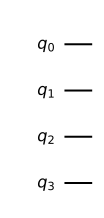

In [3]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

### 4.2 Ausgewogenes Orakel<a id="balanced_oracle"></a>

In [4]:
balanced_oracle = QuantumCircuit(n+1)

Als nächstes erstellen wir ein ausgewogenes Orakel. Wie wir in Abschnitt 1b gesehen haben, können wir ein ausgewogenes Orakel erstellen, indem wir CNOTs mit jedem Eingangs-Qubit als Kontrolle und dem Ausgangsbit als Ziel ausführen. Wir können die Eingangszustände, die 0 oder 1 ergeben, variieren, indem wir einige der Steuerelemente in X-Gatter einschließen. Lassen Sie uns zuerst eine binäre Zeichenfolge der Länge `n` auswählen, die vorschreibt, welche Steuerelemente verpackt werden sollen:

In [5]:
b_str = "101"

Jetzt haben wir diese Zeichenfolge, wir können sie als Schlüssel verwenden, um unsere X-Gatter zu platzieren. Für jedes Qubit in unserer Schaltung platzieren wir ein X-Gatter, wenn die entsprechende Ziffer in `b_str` `1` ist, oder tun nichts, wenn die Ziffer `0` ist.

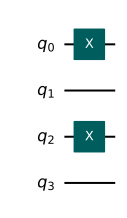

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

Als nächstes führen wir unsere Controlled-NOT-Gatter aus, wobei wir jedes Eingabe-Qubit als Kontrolle und das Ausgabe-Qubit als Ziel verwenden:

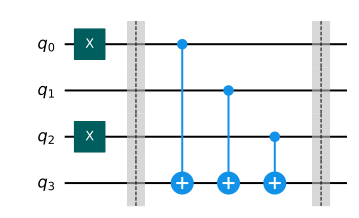

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

Schließlich wiederholen wir den Code der zwei Zellen oberhalb, um die Steuerelemente in X-Gatter zu verpacken:

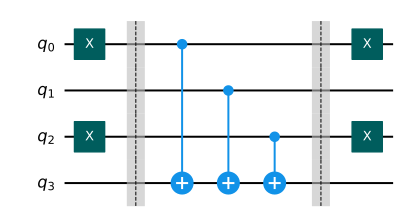

In [8]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

Wir haben gerade ein ausgewogenes Orakel erstellt! Bleibt nur noch zu sehen, ob der Deutsch-Jozsa-Algorithmus es lösen kann.

### 4.3 Der vollständige Algorithmus<a id="full_alg"></a>

Lasst uns nun alles zusammenfügen. Der erste Schritt im Algorithmus besteht darin, die Eingabe-Qubits im Zustand $|{+}\rangle$ und die Ausgabe-Qubits im Zustand $|{-}\rangle$ zu initialisieren:

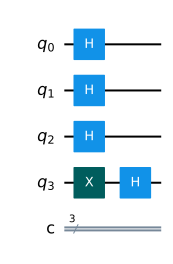

In [9]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

Als nächstes wenden wir das Orakel an. Hier wenden wir das oben erstellte `balanced_oracle` an:

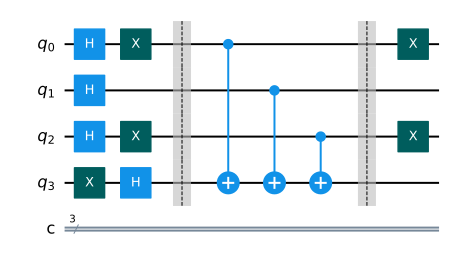

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

Schließlich führen wir H-Gatter an den $n$-Eingangs-Qubits durch und messen unser Eingangsregister:

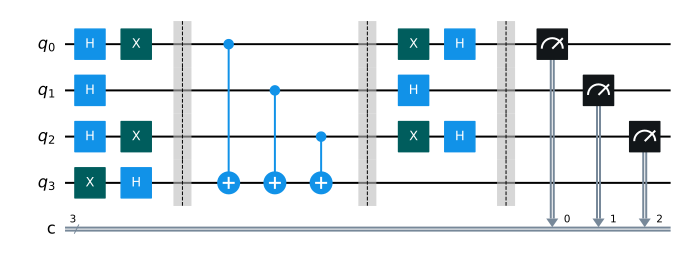

In [11]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

Sehen wir uns die Ausgabe an:

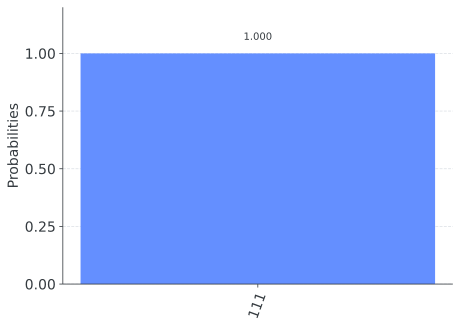

In [12]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [13]:
# ...we have a 0% chance of measuring 000. 
assert answer.get('000', 0) == 0

Wir können aus den obigen Ergebnissen sehen, dass wir eine Chance von 0 % haben, `000` zu messen. Dies sagt korrekt voraus, dass die Funktion ausgeglichen ist.

### 4.4 Verallgemeinerte Schaltungen<a id="general_circs"></a>

Unten stellen wir eine verallgemeinerte Funktion bereit, die Deutsch-Jozsa-Orakel erstellt und sie in Quantengatter umwandelt. Es nimmt den `case` an (entweder `'balanced'` oder ' `constant` ', und `n` , die Größe des Eingangsregisters:

In [14]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Lassen Sie uns auch eine Funktion erstellen, die dieses Orakelgatter nimmt und den Deutsch-Jozsa-Algorithmus darauf ausführt:

In [15]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

Lassen Sie uns abschließend diese Funktionen verwenden, um mit dem Algorithmus herumzuspielen:

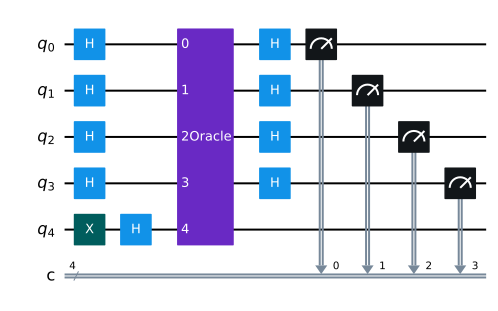

In [16]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

Und die Ergebnisse der Ausführung dieser Schaltung anzusehen:

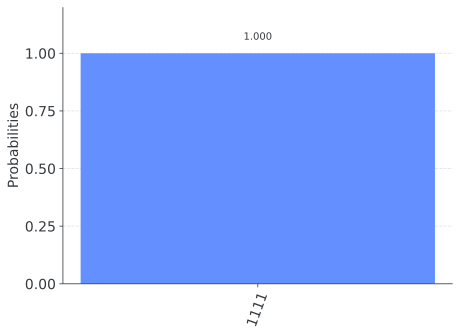

In [17]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

## 5. Experimentiere mit echten Geräten<a id="device"></a>

Wir können die Schaltung wie unten gezeigt auf einem realen Gerät ausführen. Wir suchen zuerst nach dem am wenigsten ausgelasteten Gerät, das unsere Schaltung bewältigen kann.

In [18]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_manila


In [20]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


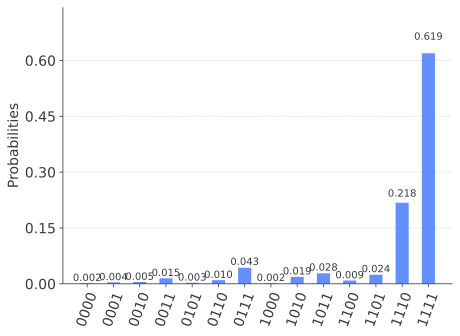

In [21]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Wie wir sehen können, ist das wahrscheinlichste Ergebnis `1111` . Die anderen Ergebnisse sind auf Fehler in der Quantenberechnung zurückzuführen. 

In [22]:
# ...the most likely result is 1111.
assert max(answer, key=answer.get) == '1111'

## 6. Probleme<a id="problems"></a>

1. Sind Sie in der Lage, ein ausgewogenes oder konstantes Orakel einer anderen Form zu erstellen?

2. Die Funktion `dj_problem_oracle` (unten) gibt ein Deutsch-Jozsa-Orakel für `n = 4` in Form eines Gatters zurück. Das Gatter nimmt 5 Qubits als Eingabe, wobei das letzte Qubit ( `q_4` ) das Ausgabe-Qubit ist (wie bei den obigen Beispielorakeln). Sie können verschiedene Orakel erhalten, indem Sie `dj_problem_oracle` verschiedene ganze Zahlen zwischen 1 und 5 geben. Verwenden Sie den Deutsch-Jozsa-Algorithmus, um zu entscheiden, ob die Orakel ausgeglichen oder konstant sind ( **Hinweis:** Es wird dringend empfohlen, dieses Beispiel mit dem `aer_simulator` anstelle eines echten Geräts auszuprobieren). .

In [23]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)

## 7. Referenzen<a id="references"></a>

1. David Deutsch und Richard Jozsa (1992). "Schnelle Problemlösungen durch Quantencomputing". Verfahren der Royal Society of London A. 439: 553–558. [doi:10.1098/rsp.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167) .
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantenalgorithmen überarbeitet". Verfahren der Royal Society of London A. 454: 339–354. [doi:10.1098/rsp.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164) .

In [24]:
import qiskit.tools.jupyter
%qiskit_version_table